In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("Phising_Testing_Dataset.csv")
df_train = pd.read_csv("Phising_Training_Dataset.csv")
df_train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df_test.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [4]:
#Checking the shape of the Train Data
df_train.shape

(8955, 32)

In [5]:
#Checking for null values if any
df_train.isnull().sum()[df_train.isnull().sum() >= 0]

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

<AxesSubplot:>

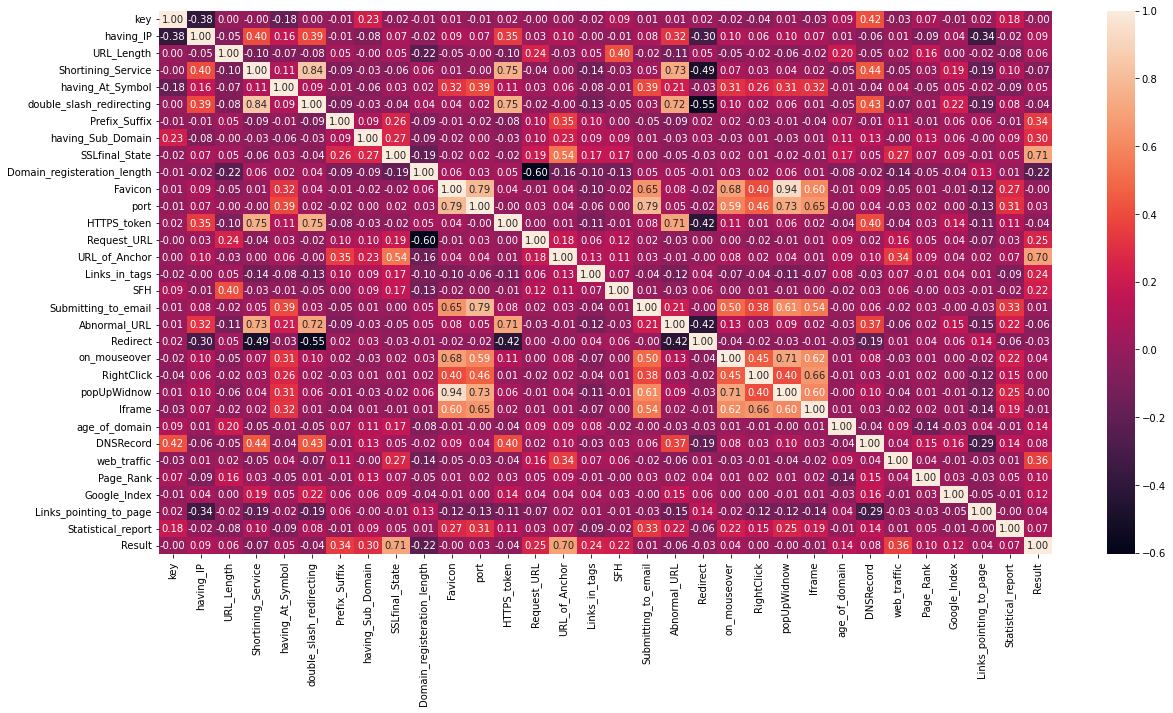

In [7]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df_train.corr(),annot=True, fmt=".2f")

<AxesSubplot:>

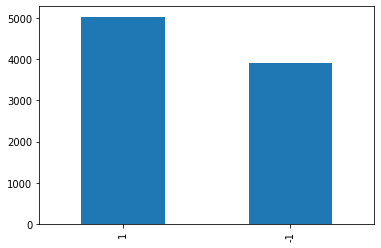

In [8]:
# checking class imbalance in train data
df_train.Result.value_counts().plot.bar()


# Building Model

In [9]:
# Splitting the Data

X_train = df_train.drop(["Result","key"],axis=1)
y_train = df_train.Result

#### Logistic Regression

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_result = logistic_model.fit()
logistic_model_result.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1013: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 8955
Model:                            GLM   Df Residuals:                     8924
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 May 2022   Deviance:                   4.5756e+05
Time:                        12:25:19   Pearson chi2:                 2.60e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.473e+17   2.76e+06  -5.33e+10      0.000   -1.47e+17   -1.47e+17
having_IP                    1.612e+16   9.77e+05   1.65e+10      0.000    1.61e+16    1.61e+16
URL_Length                  -2.005e+15   1.13e+06  -1.77e+09      0.000      -2e+15      -2e+15
Shortining_Service          -2.528e+16   2.24e+06  -1.13e+10      0.000   -2.53e+16   -2.53e+16
having_At_Symbol             1.288e+16   1.22e+06   1.05e+10      0.000    1.29e+16    1.29e+16
double_slash_redirecting     1.032e+16   2.31e+06   4.46e+09      0.000    1.03e+16    1.03e+16
Prefix_Suffix                8.818e+15   1.15e+06    7.7e+09      0.000    8.82e+15    8.82e+15
having_Sub_Domain            1.335e+16   9.43e+05   1.42e+10      0.000    1.34e+16    1.34e+16
SSLfinal_State               1.161e+17   9.91e+05   1.17e+11      0.000    1.16e+17    1.16e+17
Domain_registeration_length  7.844e+14   9.69e+05    8.1e+08      0.000    7.84e+14    7.84e+14
Favicon                     -7.468e+15   2.94e+06  -2.54e+09      0.000   -7.47e+15   -7.47e+15
port                         1.366e+16   2.37e+06   5.77e+09      0.000    1.37e+16    1.37e+16
HTTPS_token                  -7.68e+15   1.63e+06   -4.7e+09      0.000   -7.68e+15   -7.68e+15
Request_URL                  1.333e+16   9.33e+05   1.43e+10      0.000    1.33e+16    1.33e+16
URL_of_Anchor                1.255e+17   1.31e+06   9.55e+10      0.000    1.25e+17    1.25e+17
Links_in_tags                1.562e+16   9.76e+05    1.6e+10      0.000    1.56e+16    1.56e+16
SFH                          1.351e+16   1.07e+06   1.26e+10      0.000    1.35e+16    1.35e+16
Submitting_to_email         -1.018e+16   1.66e+06  -6.12e+09      0.000   -1.02e+16   -1.02e+16
Abnormal_URL                -1.015e+16   1.78e+06   -5.7e+09      0.000   -1.02e+16   -1.02e+16
Redirect                    -3.139e+16   2.81e+06  -1.12e+10      0.000   -3.14e+16   -3.14e+16
on_mouseover                  1.99e+15   1.74e+06   1.14e+09      0.000    1.99e+15    1.99e+15
RightClick                   -1.82e+15   2.44e+06  -7.45e+08      0.000   -1.82e+15   -1.82e+15
popUpWidnow                  3.516e+15   2.71e+06    1.3e+09      0.000    3.52e+15    3.52e+15
Iframe                      -6.694e+15   2.12e+06  -3.15e+09      0.000   -6.69e+15   -6.69e+15
age_of_domain                1.934e+15   7.69e+05   2.51e+09      0.000    1.93e+15    1.93e+15
DNSRecord                    1.334e+16   1.02e+06   1.31e+10      0.000    1.33e+16    1.33e+16
web_traffic                  1.997e+16   9.42e+05   2.12e+10      0.000       2e+16       2e+16
Page_Rank                    4.722e+15    8.7e+05   5.43e+09      0.000    4.72e+15    4.72e+15
Google_Index                 1.808e+16   1.08e+06   1.67e+10      0.000    1.81e+16    1.81e+16
Links_point

In [11]:
# Checking th VIF value of variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif['VIF'],2)
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
9,Favicon,17.20
21,popUpWidnow,14.50
10,port,11.06
4,double_slash_redirecting,10.50
2,Shortining_Service,9.87
20,RightClick,9.37
22,Iframe,8.97
17,Abnormal_URL,6.29
19,on_mouseover,6.04
16,Submitting_to_email,5.38


In [12]:
X_train.drop('Favicon',axis=1,inplace=True)
logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logistic_model_result = logistic_model.fit()
logistic_model_result.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1013: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 8955
Model:                            GLM   Df Residuals:                     8925
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 May 2022   Deviance:                   4.5904e+05
Time:                        12:25:22   Pearson chi2:                 2.60e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.468e+17   2.76e+06  -5.32e+10      0.000   -1.47e+17   -1.47e+17
having_IP                    1.612e+16   9.76e+05   1.65e+10      0.000    1.61e+16    1.61e+16
URL_Length                  -2.002e+15   1.13e+06  -1.76e+09      0.000      -2e+15      -2e+15
Shortining_Service          -2.536e+16   2.23e+06  -1.14e+10      0.000   -2.54e+16   -2.54e+16
having_At_Symbol             1.259e+16   1.22e+06   1.03e+10      0.000    1.26e+16    1.26e+16
double_slash_redirecting     1.052e+16   2.31e+06   4.55e+09      0.000    1.05e+16    1.05e+16
Prefix_Suffix                  8.8e+15   1.14e+06   7.69e+09      0.000     8.8e+15     8.8e+15
having_Sub_Domain            1.355e+16   9.43e+05   1.44e+10      0.000    1.36e+16    1.36e+16
SSLfinal_State               1.162e+17   9.91e+05   1.17e+11      0.000    1.16e+17    1.16e+17
Domain_registeration_length  9.072e+14   9.68e+05   9.37e+08      0.000    9.07e+14    9.07e+14
port                         8.969e+15   2.23e+06   4.02e+09      0.000    8.97e+15    8.97e+15
HTTPS_token                  -8.06e+15   1.63e+06  -4.94e+09      0.000   -8.06e+15   -8.06e+15
Request_URL                  1.348e+16   9.33e+05   1.44e+10      0.000    1.35e+16    1.35e+16
URL_of_Anchor                1.255e+17   1.31e+06   9.55e+10      0.000    1.26e+17    1.26e+17
Links_in_tags                1.547e+16   9.76e+05   1.58e+10      0.000    1.55e+16    1.55e+16
SFH                          1.358e+16   1.07e+06   1.26e+10      0.000    1.36e+16    1.36e+16
Submitting_to_email         -8.842e+15   1.66e+06  -5.32e+09      0.000   -8.84e+15   -8.84e+15
Abnormal_URL                -1.012e+16   1.78e+06  -5.68e+09      0.000   -1.01e+16   -1.01e+16
Redirect                    -3.142e+16   2.81e+06  -1.12e+10      0.000   -3.14e+16   -3.14e+16
on_mouseover                 1.287e+15   1.74e+06   7.38e+08      0.000    1.29e+15    1.29e+15
RightClick                  -2.093e+15   2.44e+06  -8.57e+08      0.000   -2.09e+15   -2.09e+15
popUpWidnow                 -1.808e+15   1.56e+06  -1.16e+09      0.000   -1.81e+15   -1.81e+15
Iframe                       -4.45e+15   2.12e+06   -2.1e+09      0.000   -4.45e+15   -4.45e+15
age_of_domain                1.948e+15   7.69e+05   2.53e+09      0.000    1.95e+15    1.95e+15
DNSRecord                    1.334e+16   1.02e+06   1.31e+10      0.000    1.33e+16    1.33e+16
web_traffic                  1.989e+16   9.41e+05   2.11e+10      0.000    1.99e+16    1.99e+16
Page_Rank                     4.59e+15    8.7e+05   5.28e+09      0.000    4.59e+15    4.59e+15
Google_Index                 1.851e+16   1.08e+06   1.71e+10      0.000    1.85e+16    1.85e+16
Links_pointing_to_page       2.454e+16    1.5e+06   1.64e+10      0.000    2.45e+16    2.45e+16
Statistical

In [13]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
4,double_slash_redirecting,10.50
2,Shortining_Service,9.78
9,port,9.77
19,RightClick,9.37
21,Iframe,8.96
16,Abnormal_URL,6.29
18,on_mouseover,6.03
15,Submitting_to_email,5.38
10,HTTPS_token,5.28
20,popUpWidnow,4.80


In [14]:
X_train.drop("double_slash_redirecting",axis=1,inplace=True)
logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_result = logistic_model.fit()
logistic_model_result.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1013: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 8955
Model:                            GLM   Df Residuals:                     8926
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 May 2022   Deviance:                   4.5756e+05
Time:                        12:25:25   Pearson chi2:                 2.60e+19
No. Iterations:                    29   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -4.033e+16   2.75e+06  -1.47e+10      0.000   -4.03e+16   -4.03e+16
having_IP                    4.591e+15   9.71e+05   4.73e+09      0.000    4.59e+15    4.59e+15
URL_Length                  -4.813e+14   1.13e+06  -4.25e+08      0.000   -4.81e+14   -4.81e+14
Shortining_Service          -5.974e+15      2e+06  -2.99e+09      0.000   -5.97e+15   -5.97e+15
having_At_Symbol             3.162e+15   1.22e+06   2.59e+09      0.000    3.16e+15    3.16e+15
Prefix_Suffix                2.247e+15   1.14e+06   1.97e+09      0.000    2.25e+15    2.25e+15
having_Sub_Domain            3.671e+15   9.43e+05   3.89e+09      0.000    3.67e+15    3.67e+15
SSLfinal_State               3.231e+16    9.9e+05   3.26e+10      0.000    3.23e+16    3.23e+16
Domain_registeration_length  1.712e+14   9.68e+05   1.77e+08      0.000    1.71e+14    1.71e+14
port                         3.157e+15    2.2e+06   1.43e+09      0.000    3.16e+15    3.16e+15
HTTPS_token                 -1.539e+15   1.58e+06  -9.75e+08      0.000   -1.54e+15   -1.54e+15
Request_URL                  3.636e+15   9.33e+05    3.9e+09      0.000    3.64e+15    3.64e+15
URL_of_Anchor                3.376e+16   1.31e+06   2.57e+10      0.000    3.38e+16    3.38e+16
Links_in_tags                4.096e+15   9.75e+05    4.2e+09      0.000     4.1e+15     4.1e+15
SFH                          3.777e+15   1.07e+06   3.52e+09      0.000    3.78e+15    3.78e+15
Submitting_to_email          -2.84e+15   1.64e+06  -1.73e+09      0.000   -2.84e+15   -2.84e+15
Abnormal_URL                -2.233e+15   1.74e+06  -1.28e+09      0.000   -2.23e+15   -2.23e+15
Redirect                    -9.797e+15   2.69e+06  -3.64e+09      0.000    -9.8e+15    -9.8e+15
on_mouseover                 5.109e+14   1.74e+06   2.93e+08      0.000    5.11e+14    5.11e+14
RightClick                   -3.59e+14   2.44e+06  -1.47e+08      0.000   -3.59e+14   -3.59e+14
popUpWidnow                 -5.571e+14   1.56e+06  -3.58e+08      0.000   -5.57e+14   -5.57e+14
Iframe                      -1.523e+15   2.12e+06  -7.18e+08      0.000   -1.52e+15   -1.52e+15
age_of_domain                4.962e+14   7.69e+05   6.46e+08      0.000    4.96e+14    4.96e+14
DNSRecord                    3.698e+15   1.01e+06   3.67e+09      0.000     3.7e+15     3.7e+15
web_traffic                  5.395e+15    9.4e+05   5.74e+09      0.000     5.4e+15     5.4e+15
Page_Rank                    1.285e+15   8.69e+05   1.48e+09      0.000    1.28e+15    1.28e+15
Google_Index                 5.398e+15   1.07e+06   5.06e+09      0.000     5.4e+15     5.4e+15
Links_pointing_to_page       6.744e+15    1.5e+06   4.51e+09      0.000    6.74e+15    6.74e+15
Statistical_report           3.826e+15    1.2e+06   3.18e+09      0.000    3.83e+15    3.83e+15
===========

In [15]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [(variance_inflation_factor(X_train.values,i)) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
8,port,9.51
18,RightClick,9.33
20,Iframe,8.95
2,Shortining_Service,7.73
17,on_mouseover,6.02
15,Abnormal_URL,6.01
14,Submitting_to_email,5.22
9,HTTPS_token,4.96
19,popUpWidnow,4.79
3,having_At_Symbol,2.95


In [16]:
X_train.drop("port",axis=1,inplace=True)
logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_result = logistic_model.fit()
logistic_model_result.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1013: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 8955
Model:                            GLM   Df Residuals:                     8927
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 May 2022   Deviance:                   4.5682e+05
Time:                        12:25:27   Pearson chi2:                 2.59e+19
No. Iterations:                     8   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -8.987e+15   2.73e+06   -3.3e+09      0.000   -8.99e+15   -8.99e+15
having_IP                    9.834e+14   9.69e+05   1.02e+09      0.000    9.83e+14    9.83e+14
URL_Length                  -8.435e+13   1.13e+06  -7.46e+07      0.000   -8.43e+13   -8.43e+13
Shortining_Service          -1.283e+15   1.99e+06  -6.44e+08      0.000   -1.28e+15   -1.28e+15
having_At_Symbol             8.386e+14   1.21e+06   6.96e+08      0.000    8.39e+14    8.39e+14
Prefix_Suffix                5.335e+14   1.14e+06   4.67e+08      0.000    5.33e+14    5.33e+14
having_Sub_Domain            8.258e+14   9.43e+05   8.76e+08      0.000    8.26e+14    8.26e+14
SSLfinal_State               7.446e+15   9.89e+05   7.53e+09      0.000    7.45e+15    7.45e+15
Domain_registeration_length -1.662e+13   9.68e+05  -1.72e+07      0.000   -1.66e+13   -1.66e+13
HTTPS_token                  -3.36e+14   1.58e+06  -2.13e+08      0.000   -3.36e+14   -3.36e+14
Request_URL                  8.011e+14   9.33e+05   8.58e+08      0.000    8.01e+14    8.01e+14
URL_of_Anchor                6.546e+15   1.31e+06   4.98e+09      0.000    6.55e+15    6.55e+15
Links_in_tags                9.644e+14   9.75e+05   9.89e+08      0.000    9.64e+14    9.64e+14
SFH                          8.703e+14   1.07e+06   8.12e+08      0.000     8.7e+14     8.7e+14
Submitting_to_email         -3.354e+14   1.33e+06  -2.52e+08      0.000   -3.35e+14   -3.35e+14
Abnormal_URL                -6.683e+14   1.71e+06  -3.91e+08      0.000   -6.68e+14   -6.68e+14
Redirect                    -2.268e+15   2.68e+06  -8.46e+08      0.000   -2.27e+15   -2.27e+15
on_mouseover                  1.36e+14   1.74e+06   7.82e+07      0.000    1.36e+14    1.36e+14
RightClick                   -3.82e+13   2.44e+06  -1.57e+07      0.000   -3.82e+13   -3.82e+13
popUpWidnow                  3.685e+13   1.46e+06   2.53e+07      0.000    3.68e+13    3.68e+13
Iframe                      -3.295e+14   2.09e+06  -1.58e+08      0.000   -3.29e+14   -3.29e+14
age_of_domain                1.454e+14   7.68e+05   1.89e+08      0.000    1.45e+14    1.45e+14
DNSRecord                    8.108e+14   1.01e+06   8.05e+08      0.000    8.11e+14    8.11e+14
web_traffic                  1.201e+15   9.39e+05   1.28e+09      0.000     1.2e+15     1.2e+15
Page_Rank                     2.87e+14   8.69e+05    3.3e+08      0.000    2.87e+14    2.87e+14
Google_Index                 1.208e+15   1.07e+06   1.13e+09      0.000    1.21e+15    1.21e+15
Links_pointing_to_page       1.392e+15   1.48e+06   9.42e+08      0.000    1.39e+15    1.39e+15
Statistical_report           8.776e+14   1.19e+06   7.36e+08      0.000    8.78e+14    8.78e+14
===============================================================================================
"""

In [17]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [(variance_inflation_factor(X_train.values,i)) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
17,RightClick,9.24
19,Iframe,8.69
2,Shortining_Service,7.68
16,on_mouseover,6.02
14,Abnormal_URL,5.80
8,HTTPS_token,4.96
18,popUpWidnow,4.23
13,Submitting_to_email,3.46
3,having_At_Symbol,2.87
26,Statistical_report,2.74


In [18]:
X_train.drop("RightClick",axis=1,inplace=True)
logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_result = logistic_model.fit()
logistic_model_result.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1013: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 8955
Model:                            GLM   Df Residuals:                     8928
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 May 2022   Deviance:                   4.5821e+05
Time:                        12:25:28   Pearson chi2:                 2.60e+19
No. Iterations:                    19   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -2.509e+16   2.41e+06  -1.04e+10      0.000   -2.51e+16   -2.51e+16
having_IP                     2.79e+15   9.68e+05   2.88e+09      0.000    2.79e+15    2.79e+15
URL_Length                  -2.008e+14   1.13e+06  -1.78e+08      0.000   -2.01e+14   -2.01e+14
Shortining_Service          -3.646e+15   1.99e+06  -1.83e+09      0.000   -3.65e+15   -3.65e+15
having_At_Symbol             2.456e+15    1.2e+06   2.04e+09      0.000    2.46e+15    2.46e+15
Prefix_Suffix                1.374e+15   1.14e+06    1.2e+09      0.000    1.37e+15    1.37e+15
having_Sub_Domain            2.245e+15   9.43e+05   2.38e+09      0.000    2.25e+15    2.25e+15
SSLfinal_State               2.054e+16   9.89e+05   2.08e+10      0.000    2.05e+16    2.05e+16
Domain_registeration_length  9.569e+13   9.68e+05   9.88e+07      0.000    9.57e+13    9.57e+13
HTTPS_token                 -9.726e+14   1.58e+06  -6.16e+08      0.000   -9.73e+14   -9.73e+14
Request_URL                  2.287e+15   9.33e+05   2.45e+09      0.000    2.29e+15    2.29e+15
URL_of_Anchor                2.084e+16   1.31e+06   1.59e+10      0.000    2.08e+16    2.08e+16
Links_in_tags                2.546e+15   9.75e+05   2.61e+09      0.000    2.55e+15    2.55e+15
SFH                          2.392e+15   1.07e+06   2.23e+09      0.000    2.39e+15    2.39e+15
Submitting_to_email         -1.079e+15   1.33e+06  -8.12e+08      0.000   -1.08e+15   -1.08e+15
Abnormal_URL                -1.841e+15   1.71e+06  -1.08e+09      0.000   -1.84e+15   -1.84e+15
Redirect                    -6.304e+15   2.68e+06  -2.35e+09      0.000    -6.3e+15    -6.3e+15
on_mouseover                 3.447e+14   1.73e+06   1.99e+08      0.000    3.45e+14    3.45e+14
popUpWidnow                  1.876e+14   1.46e+06   1.29e+08      0.000    1.88e+14    1.88e+14
Iframe                      -9.781e+14   1.82e+06  -5.37e+08      0.000   -9.78e+14   -9.78e+14
age_of_domain                3.886e+14   7.68e+05   5.06e+08      0.000    3.89e+14    3.89e+14
DNSRecord                    2.334e+15   1.01e+06   2.32e+09      0.000    2.33e+15    2.33e+15
web_traffic                  3.287e+15   9.39e+05    3.5e+09      0.000    3.29e+15    3.29e+15
Page_Rank                    8.142e+14   8.69e+05   9.37e+08      0.000    8.14e+14    8.14e+14
Google_Index                 3.391e+15   1.07e+06   3.18e+09      0.000    3.39e+15    3.39e+15
Links_pointing_to_page       3.959e+15   1.47e+06   2.69e+09      0.000    3.96e+15    3.96e+15
Statistical_report           2.636e+15   1.19e+06   2.21e+09      0.000    2.64e+15    2.64e+15
===============================================================================================
"""

In [19]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [(variance_inflation_factor(X_train.values,i)) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
2,Shortining_Service,7.53
18,Iframe,5.95
16,on_mouseover,5.92
14,Abnormal_URL,5.80
8,HTTPS_token,4.95
17,popUpWidnow,4.20
13,Submitting_to_email,3.46
3,having_At_Symbol,2.83
25,Statistical_report,2.68
1,URL_Length,2.51


In [20]:
X_train.drop("Shortining_Service",axis=1,inplace=True)
logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_result = logistic_model.fit()
logistic_model_result.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1013: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 8955
Model:                            GLM   Df Residuals:                     8929
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 May 2022   Deviance:                   4.5802e+05
Time:                        12:25:30   Pearson chi2:                 2.60e+19
No. Iterations:                    37   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -5.356e+16   2.35e+06  -2.27e+10      0.000   -5.36e+16   -5.36e+16
having_IP                    4.647e+15   9.41e+05   4.94e+09      0.000    4.65e+15    4.65e+15
URL_Length                  -3.478e+14   1.13e+06  -3.08e+08      0.000   -3.48e+14   -3.48e+14
having_At_Symbol             4.777e+15    1.2e+06   3.97e+09      0.000    4.78e+15    4.78e+15
Prefix_Suffix                2.974e+15   1.14e+06   2.61e+09      0.000    2.97e+15    2.97e+15
having_Sub_Domain            4.791e+15   9.43e+05   5.08e+09      0.000    4.79e+15    4.79e+15
SSLfinal_State               4.235e+16   9.85e+05    4.3e+10      0.000    4.24e+16    4.24e+16
Domain_registeration_length -7.553e+12   9.68e+05   -7.8e+06      0.000   -7.55e+12   -7.55e+12
HTTPS_token                 -4.423e+15   1.47e+06  -3.01e+09      0.000   -4.42e+15   -4.42e+15
Request_URL                  4.548e+15   9.32e+05   4.88e+09      0.000    4.55e+15    4.55e+15
URL_of_Anchor                4.414e+16   1.31e+06   3.36e+10      0.000    4.41e+16    4.41e+16
Links_in_tags                5.266e+15   9.71e+05   5.42e+09      0.000    5.27e+15    5.27e+15
SFH                          4.538e+15   1.07e+06   4.24e+09      0.000    4.54e+15    4.54e+15
Submitting_to_email         -1.898e+15   1.32e+06  -1.43e+09      0.000    -1.9e+15    -1.9e+15
Abnormal_URL                -5.318e+15   1.59e+06  -3.34e+09      0.000   -5.32e+15   -5.32e+15
Redirect                    -1.064e+16   2.61e+06  -4.08e+09      0.000   -1.06e+16   -1.06e+16
on_mouseover                 9.331e+14   1.73e+06   5.39e+08      0.000    9.33e+14    9.33e+14
popUpWidnow                  3.678e+14   1.46e+06   2.53e+08      0.000    3.68e+14    3.68e+14
Iframe                       -1.93e+15   1.82e+06  -1.06e+09      0.000   -1.93e+15   -1.93e+15
age_of_domain                7.704e+14   7.68e+05      1e+09      0.000     7.7e+14     7.7e+14
DNSRecord                    3.464e+15   9.72e+05   3.56e+09      0.000    3.46e+15    3.46e+15
web_traffic                    6.8e+15   9.39e+05   7.24e+09      0.000     6.8e+15     6.8e+15
Page_Rank                    1.396e+15   8.69e+05   1.61e+09      0.000     1.4e+15     1.4e+15
Google_Index                 6.196e+15   1.06e+06   5.87e+09      0.000     6.2e+15     6.2e+15
Links_pointing_to_page       7.368e+15   1.47e+06      5e+09      0.000    7.37e+15    7.37e+15
Statistical_report           5.621e+15   1.19e+06   4.72e+09      0.000    5.62e+15    5.62e+15
===============================================================================================
"""

In [21]:
logistic_model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logistic_model_result = logistic_model.fit()
logistic_model_result.summary()

/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1013: RuntimeWarning: invalid value encountered in add
  special.gammaln(n + 1) - special.gammaln(y + 1) -


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Result   No. Observations:                 8955
Model:                            GLM   Df Residuals:                     8929
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 24 May 2022   Deviance:                   4.5802e+05
Time:                        12:25:30   Pearson chi2:                 2.60e+19
No. Iterations:                    37   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -5.356e+16   2.35e+06  -2.27e+10      0.000   -5.36e+16   -5.36e+16
having_IP                    4.647e+15   9.41e+05   4.94e+09      0.000    4.65e+15    4.65e+15
URL_Length                  -3.478e+14   1.13e+06  -3.08e+08      0.000   -3.48e+14   -3.48e+14
having_At_Symbol             4.777e+15    1.2e+06   3.97e+09      0.000    4.78e+15    4.78e+15
Prefix_Suffix                2.974e+15   1.14e+06   2.61e+09      0.000    2.97e+15    2.97e+15
having_Sub_Domain            4.791e+15   9.43e+05   5.08e+09      0.000    4.79e+15    4.79e+15
SSLfinal_State               4.235e+16   9.85e+05    4.3e+10      0.000    4.24e+16    4.24e+16
Domain_registeration_length -7.553e+12   9.68e+05   -7.8e+06      0.000   -7.55e+12   -7.55e+12
HTTPS_token                 -4.423e+15   1.47e+06  -3.01e+09      0.000   -4.42e+15   -4.42e+15
Request_URL                  4.548e+15   9.32e+05   4.88e+09      0.000    4.55e+15    4.55e+15
URL_of_Anchor                4.414e+16   1.31e+06   3.36e+10      0.000    4.41e+16    4.41e+16
Links_in_tags                5.266e+15   9.71e+05   5.42e+09      0.000    5.27e+15    5.27e+15
SFH                          4.538e+15   1.07e+06   4.24e+09      0.000    4.54e+15    4.54e+15
Submitting_to_email         -1.898e+15   1.32e+06  -1.43e+09      0.000    -1.9e+15    -1.9e+15
Abnormal_URL                -5.318e+15   1.59e+06  -3.34e+09      0.000   -5.32e+15   -5.32e+15
Redirect                    -1.064e+16   2.61e+06  -4.08e+09      0.000   -1.06e+16   -1.06e+16
on_mouseover                 9.331e+14   1.73e+06   5.39e+08      0.000    9.33e+14    9.33e+14
popUpWidnow                  3.678e+14   1.46e+06   2.53e+08      0.000    3.68e+14    3.68e+14
Iframe                       -1.93e+15   1.82e+06  -1.06e+09      0.000   -1.93e+15   -1.93e+15
age_of_domain                7.704e+14   7.68e+05      1e+09      0.000     7.7e+14     7.7e+14
DNSRecord                    3.464e+15   9.72e+05   3.56e+09      0.000    3.46e+15    3.46e+15
web_traffic                    6.8e+15   9.39e+05   7.24e+09      0.000     6.8e+15     6.8e+15
Page_Rank                    1.396e+15   8.69e+05   1.61e+09      0.000     1.4e+15     1.4e+15
Google_Index                 6.196e+15   1.06e+06   5.87e+09      0.000     6.2e+15     6.2e+15
Links_pointing_to_page       7.368e+15   1.47e+06      5e+09      0.000    7.37e+15    7.37e+15
Statistical_report           5.621e+15   1.19e+06   4.72e+09      0.000    5.62e+15    5.62e+15
===============================================================================================
"""

In [22]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [(variance_inflation_factor(X_train.values,i)) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values("VIF",ascending=False)
vif

,Features,VIF
15,on_mouseover,5.92
17,Iframe,5.81
13,Abnormal_URL,4.96
7,HTTPS_token,4.28
16,popUpWidnow,4.19
12,Submitting_to_email,3.41
2,having_At_Symbol,2.82
24,Statistical_report,2.68
1,URL_Length,2.51
3,Prefix_Suffix,2.27


In [23]:
y_train_pred = pd.DataFrame()
y_train_pred['Actual'] = y_train
y_train_pred['PredPercent'] = logistic_model_result.predict(sm.add_constant(X_train)).values.reshape(-1)
y_train_pred.head()


/usr/local/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


,Actual,PredPercent
0,-1,0.0
1,-1,0.0
2,-1,0.0
3,-1,0.0
4,1,0.0


In [24]:
y_train_pred.replace(0,-1,inplace=True)
y_train_pred.head()

,Actual,PredPercent
0,-1,-1.0
1,-1,-1.0
2,-1,-1.0
3,-1,-1.0
4,1,-1.0


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred.Actual,y_train_pred.PredPercent))

              precision    recall  f1-score   support

          -1       0.70      0.98      0.82      3921
           1       0.98      0.67      0.80      5034

    accuracy                           0.81      8955
   macro avg       0.84      0.83      0.81      8955
weighted avg       0.86      0.81      0.81      8955



In [26]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model_result = logistic_model.fit(X_train,y_train)

y_train_pred["sklearnPred"] = logistic_model_result.predict(X_train)
y_train_pred.head()

,Actual,PredPercent,sklearnPred
0,-1,-1.0,-1
1,-1,-1.0,1
2,-1,-1.0,-1
3,-1,-1.0,-1
4,1,-1.0,1


In [27]:
print(classification_report(y_train_pred.Actual,y_train_pred.sklearnPred))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.92      3921
           1       0.93      0.95      0.94      5034

    accuracy                           0.93      8955
   macro avg       0.93      0.93      0.93      8955
weighted avg       0.93      0.93      0.93      8955



### Performing K-Fold Cross Validation on the data

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k_fold_cross_validation = StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
crossValidationScore = cross_val_score(logistic_model,X_train,y_train,cv=k_fold_cross_validation,n_jobs=-1,scoring="precision")
# np.sqrt(np.mean(np.absolute(crossValidationScore)))
crossValidationScore.mean()

0.9248851341261277

### Decsion Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(max_depth=3)
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

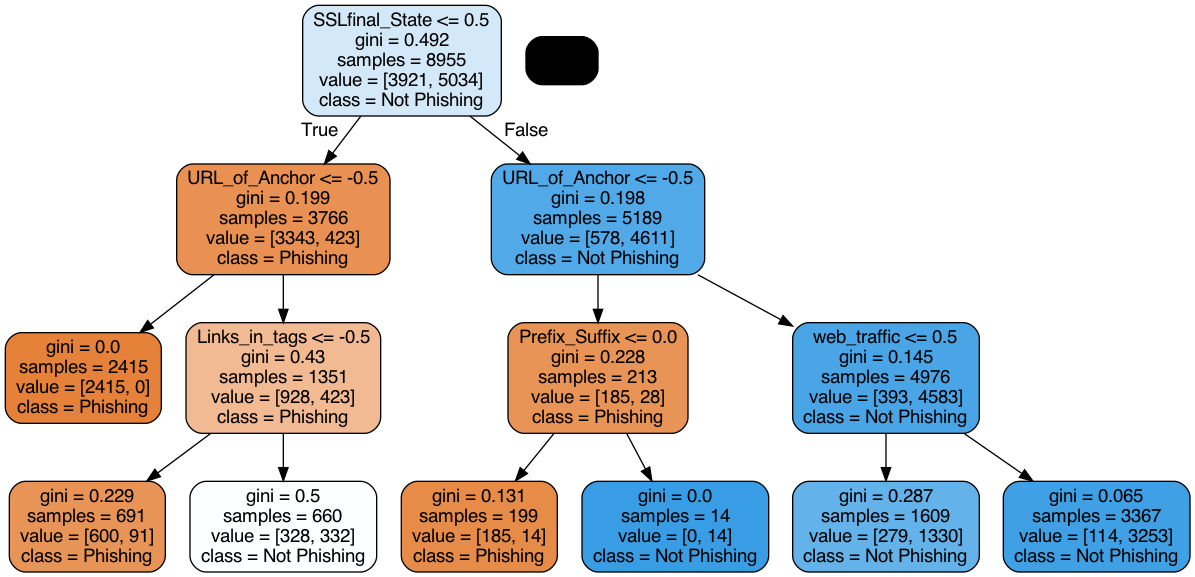

In [31]:
dot_data = StringIO()  

export_graphviz(decisionTree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns, 
                class_names=['Phishing', "Not Phishing"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
y_train_pred = decisionTree.predict(X_train)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

          -1       0.97      0.82      0.89      3921
           1       0.87      0.98      0.92      5034

    accuracy                           0.91      8955
   macro avg       0.92      0.90      0.90      8955
weighted avg       0.91      0.91      0.91      8955



In [33]:
k_fold_cross_validation = StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
crossValidationScore = cross_val_score(decisionTree,X_train,y_train,cv=k_fold_cross_validation,n_jobs=-1,scoring="precision")
# np.sqrt(np.mean(np.absolute(crossValidationScore)))
crossValidationScore.mean()

0.8896790639321269

In [34]:
# Hyper parameter Tuning
from sklearn.model_selection import GridSearchCV

decisionTree = DecisionTreeClassifier(random_state=100)

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=decisionTree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='precision', verbose=1)

In [35]:
decisionTree = grid_search.best_estimator_

k_fold_cross_validation = StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
crossValidationScore = cross_val_score(decisionTree,X_train,y_train,cv=k_fold_cross_validation,n_jobs=-1,scoring="precision")
# np.sqrt(np.mean(np.absolute(crossValidationScore)))
crossValidationScore.mean()

0.9499449599373614

In [36]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=100,n_estimators=10,max_depth=3)
randomForest.fit(X_train,y_train)

y_train_pred = randomForest.predict(X_train)

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

          -1       0.95      0.88      0.91      3921
           1       0.91      0.96      0.94      5034

    accuracy                           0.93      8955
   macro avg       0.93      0.92      0.92      8955
weighted avg       0.93      0.93      0.92      8955



In [37]:
randomForest = RandomForestClassifier(random_state=100)

params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

grid_search = GridSearchCV(estimator=randomForest, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "precision")

grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='precision', verbose=1)

In [38]:
randomForest = grid_search.best_estimator_

k_fold_cross_validation = StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
crossValidationScore = cross_val_score(randomForest,X_train,y_train,cv=k_fold_cross_validation,n_jobs=-1,scoring="precision")
# np.sqrt(np.mean(np.absolute(crossValidationScore)))
crossValidationScore.mean()

0.94498249167358

In [39]:
randomForest

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=10, random_state=100)

In [40]:
import xgboost as xgb

XGBoost_y_train = y_train
XGBoost_y_train = XGBoost_y_train.replace(-1,0)

XGBoost = xgb.XGBClassifier()

XGBoost.fit(X_train,XGBoost_y_train)

y_train_pred = XGBoost.predict(X_train)

print(classification_report(XGBoost_y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3921
           1       0.98      0.99      0.99      5034

    accuracy                           0.99      8955
   macro avg       0.99      0.98      0.99      8955
weighted avg       0.99      0.99      0.99      8955



In [41]:
from xgboost import cv

# params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}

params={}

y_train_DMatrix = y_train.replace(-1,0)

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train_DMatrix)

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50, early_stopping_rounds=10, metrics="aucpr", as_pandas=True, seed=123)

In [42]:
xgb_cv.head()

,train-aucpr-mean,train-aucpr-std,test-aucpr-mean,test-aucpr-std
0,0.982791,0.000623,0.980157,0.001053
1,0.986262,0.001030,0.982637,0.000839
2,0.989017,0.000406,0.986426,0.000601
3,0.990431,0.000208,0.986593,0.002497
4,0.991380,0.000225,0.987359,0.002657


In [43]:
from sklearn.model_selection import RandomizedSearchCV

XGBoost = xgb.XGBClassifier(random_state=100)


params={
"learning_rate":[0.05,0.15,0.20,0.25,0.30],
"max_depth":[3,4,5,6,8,10,12,15],
"min_child_weight":[1,3,5,7],
"gamma":[0.0,0.1,0.2,0.3,0.4,0.5],
"colsample_bytree":[0.3,0.4,0.5,0.7]
}

y_train_Clean = y_train.replace(-1,0)

randomizedSearchCV = RandomizedSearchCV(XGBoost, param_distributions =params, n_iter=5,
                          cv=5, n_jobs=-1, verbose=3, scoring = "roc_auc",error_score='raise')

randomizedSearchCV.fit(X_train,y_train_Clean)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.992 total time=   1.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.994 total time=   1.4s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.993 total time=   1.4s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.994 total time=   1.4s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=7;, score=0.982 total time=   1.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.995 total time=   1.8s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.995 total time=   1.8s
[CV 2/5] END colsample_

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=100,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.15, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [44]:
from sklearn.model_selection import cross_val_score

XGBoost = randomizedSearchCV.best_estimator_

score = cross_val_score(XGBoost,X_train,y_train_Clean,cv=10)

score

array([0.96540179, 0.95758929, 0.96763393, 0.96428571, 0.96651786,
       0.95977654, 0.96536313, 0.94972067, 0.94301676, 0.9575419 ])

In [45]:
score.mean()

0.9596847565841978

In [46]:
X_test = df_test.drop(columns=['key','Favicon','double_slash_redirecting','port','RightClick','Shortining_Service'],axis=0)

y_test_pred = pd.DataFrame()
y_test_pred['key'] = df_test["key"]
y_test_pred['Result'] = XGBoost.predict(X_test)

In [47]:
y_test_pred.head()

,key,Result
0,21338,1
1,21339,0
2,21340,0
3,21341,0
4,21342,1


In [48]:
y_test_pred = y_test_pred.replace(0,-1)
y_test_pred.head()

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1


In [51]:
y_test_pred.to_csv('submission.csv',index=False)